In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from chart import show, show_collection

import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

### Gamma curves

$s = c r^\gamma$

* $r$: input intensity
* $r$: output intensity
* $c$: gain
* $L$: number of graylevels

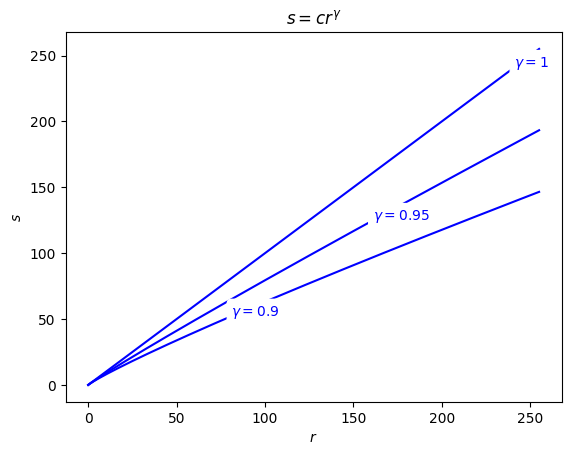

In [3]:
L = 256
r = np.arange(L)
gammas = [0.9, 0.95, 1]
c = 1.0
for i, gamma in enumerate(gammas, 1):
    s = c * (r**gamma)
    plt.plot(r, s, color="blue")

    mx = i*80 + 1 # s.size // 2
    my = s[mx] 
    plt.annotate(f"$\gamma={gamma}$", xy=(mx, my), xytext=(mx, my + 0.5), color="blue", bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))
plt.xlabel("$r$")
plt.ylabel("$s$")
plt.title("$s = c r^\gamma$")
plt.show()

Adjusting the gain so that $c = (L - 1)^{(1 - \gamma)}$:

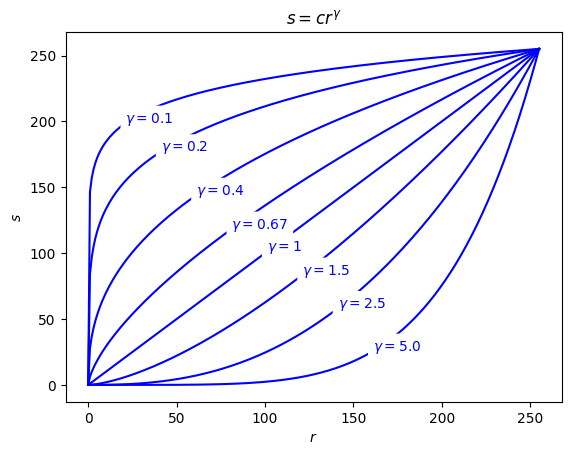

In [4]:
L = 256
r = np.arange(L)
gammas = [0.1, 0.2, 0.4, 0.67, 1, 1.5, 2.5, 5.0]
for i, gamma in enumerate(gammas, 1):
    c = (L - 1)**(1 - gamma)
    s = c * (r**gamma)
    plt.plot(r, s, color="blue")

    mx = i*20 + 1 # s.size // 2
    my = s[mx] 
    plt.annotate(f"$\gamma={gamma}$", xy=(mx, my), xytext=(mx, my + 0.5), color="blue", bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))
plt.xlabel("$r$")
plt.ylabel("$s$")
plt.title("$s = c r^\gamma$")
plt.show()

### Applying on a grayscale image

object type: <class 'numpy.ndarray'>
pixel type: uint8
dims: (512, 512)
size: 262144 bytes


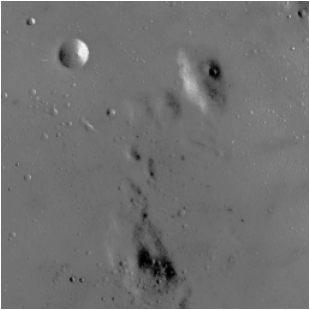

In [5]:
# Load an example image
image = data.moon()
show(image, cmap="gray", scale=0.08)
print(f"object type: {type(image)}")
print(f"pixel type: {image.dtype}")
print(f"dims: {image.shape}")
print(f"size: {image.size * image.itemsize} bytes")

corrected1 stats
minimum value: 0.0
maximum value: 65025.0
mean value: 12759.70930480957
standard deviation: 2843.987029117041

corrected2 stats
minimum value: 0.0
maximum value: 255.0
mean value: 50.03807570513557
standard deviation: 11.15289031026291


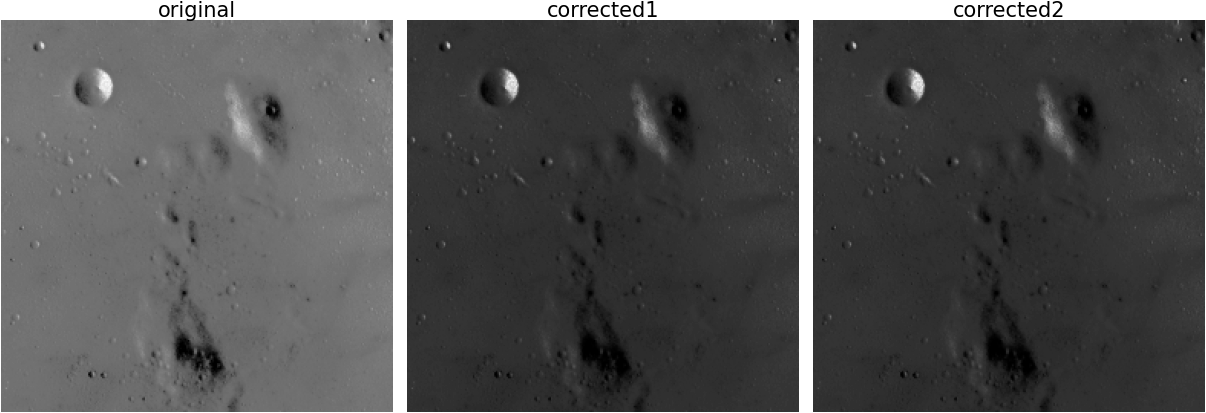

In [6]:
L = 256
gamma = 2.0
c1 = 1.0
c2 = (L - 1)**(1 - gamma)
corrected1 = c1 * (image**gamma)
corrected2 = c2 * (image**gamma)
show_collection([image, corrected1, corrected2], titles=["original", "corrected1", "corrected2"], scale=0.08, cmap="gray", fontsize=15)

print("corrected1 stats")
min_val = np.min(corrected1)
max_val = np.max(corrected1)
mean_val = np.mean(corrected1)
std_dev = np.std(corrected1)

print(f"minimum value: {min_val}")
print(f"maximum value: {max_val}")
print(f"mean value: {mean_val}")
print(f"standard deviation: {std_dev}")


print("\ncorrected2 stats")
min_val = np.min(corrected2)
max_val = np.max(corrected2)
mean_val = np.mean(corrected2)
std_dev = np.std(corrected2)

print(f"minimum value: {min_val}")
print(f"maximum value: {max_val}")
print(f"mean value: {mean_val}")
print(f"standard deviation: {std_dev}")

Did you notice any difference from corrected1 and corrected2? Why?

### A scikit-image example


Ref.: https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_log_gamma.html#sphx-glr-auto-examples-color-exposure-plot-log-gamma-py


**Attention**: the function `img_as_float` convert from `uint8` to `float64` and shrinks the range from $[0, 255]$ to $[0,1]$.

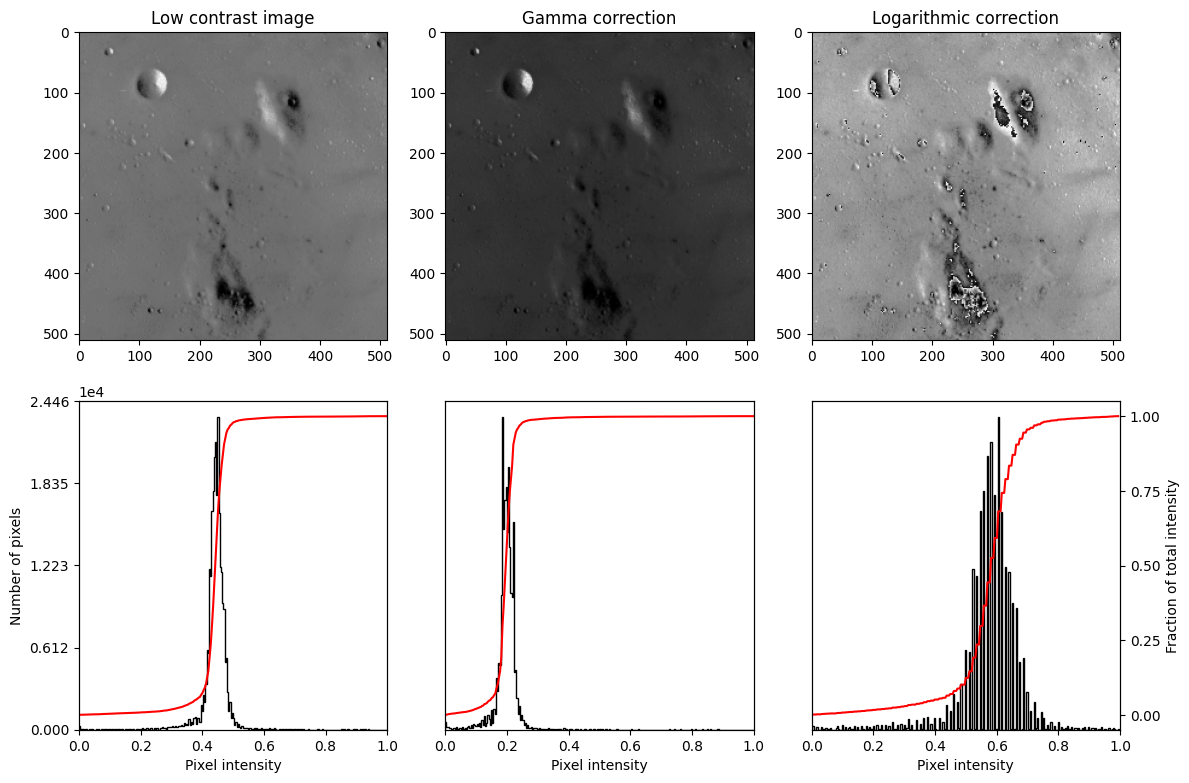

In [7]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    # ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    # print(bins)
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    # print(img_cdf)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
    

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 3)

# Display results
fig = plt.figure(figsize=(12, 8), dpi=100)
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2)
axes[0, 2] = plt.subplot(2, 3, 3)
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()